In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings, gc
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', 1000)

In [3]:
data = pd.read_csv('cloud_cost_data')

In [4]:
data.head()

,Date,MeterCategory,CostInBillingCurrency,MeterSubCategory,MeterName,ConsumedService,ResourceLocation
0,2022-12-31,Azure App Service,0.000000,Free Plan,F1 App,microsoft.web,westeurope
1,2022-12-31,Load Balancer,0.018600,Standard,Standard Included LB Rules and Outbound Rules,Microsoft.MachineLearningServices,westeurope
2,2022-12-31,Storage,0.000004,Tables,GRS Data Stored,Microsoft.Storage,northeurope
3,2022-12-31,Load Balancer,0.018600,Standard,Standard Included LB Rules and Outbound Rules,Microsoft.MachineLearningServices,westeurope
4,2022-12-31,Storage,0.014312,Standard SSD Managed Disks,E2 Disks,Microsoft.Compute,northeurope


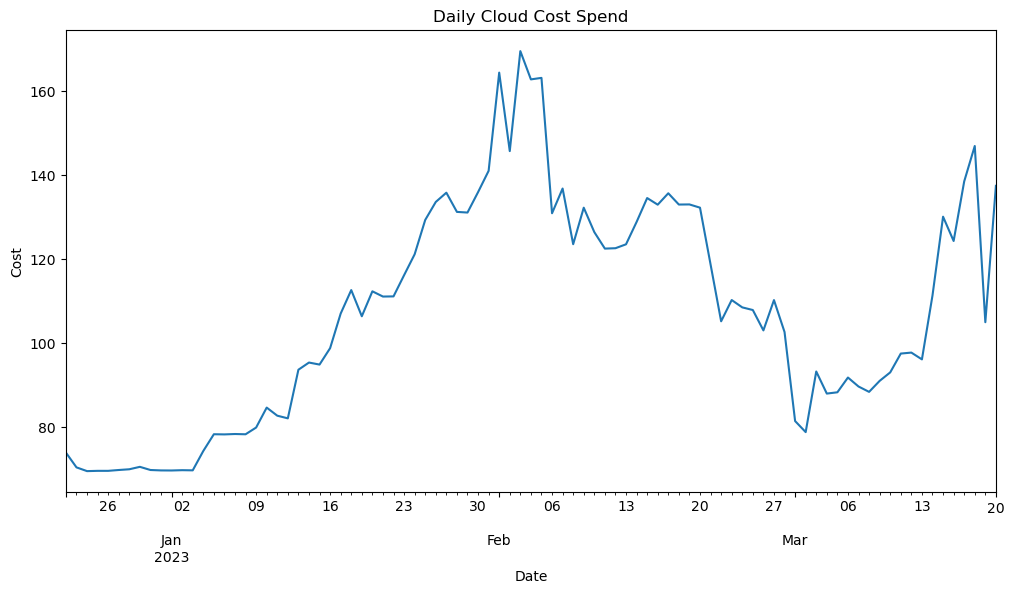

In [5]:
data['Date'] = pd.to_datetime(data['Date'])

# Set 'UsageDateTime' as the DataFrame index for time series analysis
data.set_index('Date', inplace=True)

# Plotting the time series
plt.figure(figsize=(12, 6))
data['CostInBillingCurrency'].resample('D').sum().plot()  # Resampling on daily basis and summing the costs
plt.title('Daily Cloud Cost Spend')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.show()

In [6]:
daily_costs = data['CostInBillingCurrency'].resample('D').sum()
daily_costs_df = pd.DataFrame({'TotalCost': daily_costs})

print(daily_costs_df)

             TotalCost
Date                  
2022-12-22   73.960324
2022-12-23   70.439995
2022-12-24   69.546379
2022-12-25   69.612501
2022-12-26   69.613152
2022-12-27   69.814007
2022-12-28   69.986855
2022-12-29   70.567365
2022-12-30   69.813404
2022-12-31   69.714191
2023-01-01   69.697297
2023-01-02   69.769933
2023-01-03   69.730614
2023-01-04   74.341606
2023-01-05   78.334315
2023-01-06   78.295045
2023-01-07   78.387020
2023-01-08   78.323589
2023-01-09   79.929678
2023-01-10   84.681714
2023-01-11   82.753801
2023-01-12   82.117846
2023-01-13   93.701626
2023-01-14   95.412436
2023-01-15   94.930363
2023-01-16   98.840634
2023-01-17  107.083088
2023-01-18  112.677120
2023-01-19  106.437543
2023-01-20  112.382241
2023-01-21  111.135980
2023-01-22  111.175651
2023-01-23  116.227086
2023-01-24  121.210886
2023-01-25  129.388512
2023-01-26  133.679534
2023-01-27  135.882635
2023-01-28  131.303666
2023-01-29  131.149656
2023-01-30  136.010451
2023-01-31  141.088836
2023-02-01 

In [7]:
# Calculate the 7-day moving average
ma_7 = daily_costs_df['TotalCost'].rolling(window=7).mean()

# Get the last available date
last_date = daily_costs_df.index[-1]

# Generate future dates for the next 7 days
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)

# Forecast the total cost for the next 7 days using the last 7-day window of data
forecasted_costs = []
for i, date in enumerate(future_dates):
    # Get the most recent data for the dynamic window
    window_start = max(0, len(daily_costs_df) - 7 + i)  # Adjust window start index to avoid out of range
    dynamic_window = daily_costs_df.iloc[window_start:]
    
    # Calculate the mean of the total cost in this dynamic window and use it as the forecasted value
    forecasted_cost = dynamic_window['TotalCost'].mean()
    forecasted_costs.append(forecasted_cost)

# Create a DataFrame for the forecasted data
forecast_df = pd.DataFrame({'date': future_dates, 'forecasted_totalCost': forecasted_costs})



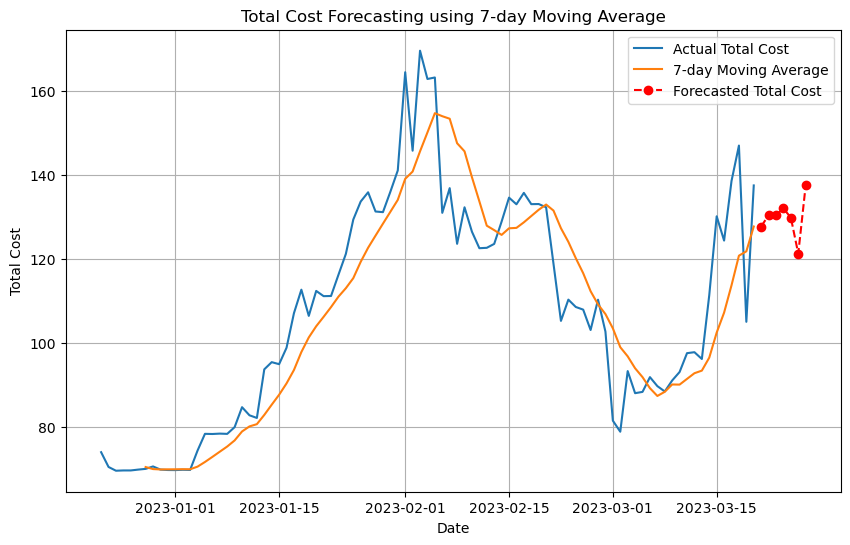

In [8]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(daily_costs_df.index, daily_costs_df['TotalCost'], label='Actual Total Cost')
plt.plot(ma_7.index, ma_7, label='7-day Moving Average')
plt.plot(forecast_df['date'], forecast_df['forecasted_totalCost'], linestyle='--', marker='o', color='red', label='Forecasted Total Cost')
plt.xlabel('Date')
plt.ylabel('Total Cost')
plt.title('Total Cost Forecasting using 7-day Moving Average')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
ma_7_df = pd.DataFrame({'MA_7': ma_7}, index=daily_costs_df.index)

In [10]:
ma_7_df

,MA_7
Date,
2022-12-22,NaN
2022-12-23,NaN
2022-12-24,NaN
2022-12-25,NaN
2022-12-26,NaN
2022-12-27,NaN
2022-12-28,70.424745
2022-12-29,69.940036
2022-12-30,69.850523


In [11]:
ma_7_df['MA_7'][82:]

Date
2023-03-14     96.491442
2023-03-15    102.453998
2023-03-16    107.214781
2023-03-17    113.714614
2023-03-18    120.779984
2023-03-19    121.814148
2023-03-20    127.720917
Freq: D, Name: MA_7, dtype: float64

In [13]:
mae = mean_absolute_error(daily_costs_df['TotalCost'][82:], ma_7_df['MA_7'][82:])
mae

19.633810530780483

In [20]:
mape = mean_absolute_percentage_error(daily_costs_df['TotalCost'][82:], ma_7_df['MA_7'][82:])
mape*100

15.335506387777409

In [16]:
rmse = np.sqrt(mean_squared_error(daily_costs_df['TotalCost'][7:], ma_7_df['MA_7'][7:]))
rmse

11.32437649594421

In [17]:
mse = mean_squared_error(daily_costs_df['TotalCost'][7:], ma_7_df['MA_7'][7:])
mse

128.24150302189366

In [18]:
forecast_df

,date,forecasted_totalCost
0,2023-03-21,127.720917
1,2023-03-22,130.442282
2,2023-03-23,130.497927
3,2023-03-24,132.029363
4,2023-03-25,129.849917
5,2023-03-26,121.269717
6,2023-03-27,137.515357


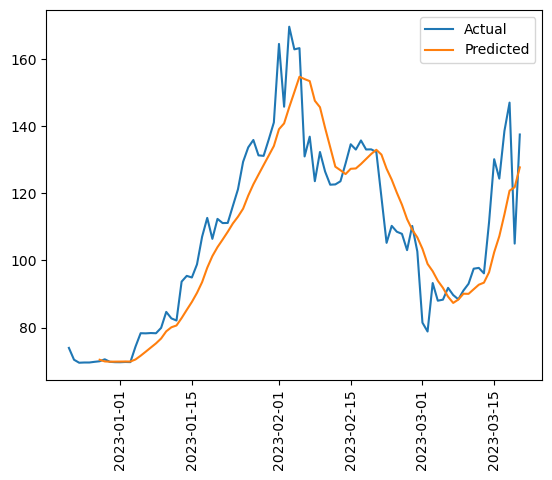

In [19]:
plt.plot(daily_costs_df['TotalCost'], label='Actual')
plt.plot(ma_7_df['MA_7'], label='Predicted')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()